This is a Deep Learning CNN Project:

In [1]:
# importing libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Deep Learning/Datasets/KNDataSets/CarBrandClassificationDataset/Train'
valid_path = '/content/drive/MyDrive/Deep Learning/Datasets/KNDataSets/CarBrandClassificationDataset/Test'

In [3]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of ResNet50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
# not training existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# glob is useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Deep Learning/Datasets/KNDataSets/CarBrandClassificationDataset/Train/*')
folders

['/content/drive/MyDrive/Deep Learning/Datasets/KNDataSets/CarBrandClassificationDataset/Train/audi',
 '/content/drive/MyDrive/Deep Learning/Datasets/KNDataSets/CarBrandClassificationDataset/Train/lamborghini',
 '/content/drive/MyDrive/Deep Learning/Datasets/KNDataSets/CarBrandClassificationDataset/Train/mercedes']

In [7]:
# our layers - we can add more if required
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# cost and optimization method to use for model:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Using Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure we provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/Datasets/KNDataSets/CarBrandClassificationDataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 75 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/Datasets/KNDataSets/CarBrandClassificationDataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47 images belonging to 3 classes.


In [14]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
3/3 [==============================] - 60s 9s/step - loss: 3.5259 - accuracy: 0.3563 - val_loss: 6.1109 - val_accuracy: 0.4043
Epoch 2/50
3/3 [==============================] - 1s 522ms/step - loss: 6.2766 - accuracy: 0.2735 - val_loss: 5.1731 - val_accuracy: 0.1915
Epoch 3/50
3/3 [==============================] - 1s 521ms/step - loss: 4.1479 - accuracy: 0.3579 - val_loss: 5.6201 - val_accuracy: 0.4043
Epoch 4/50
3/3 [==============================] - 1s 530ms/step - loss: 3.3578 - accuracy: 0.5135 - val_loss: 1.6420 - val_accuracy: 0.4681
Epoch 5/50
3/3 [==============================] - 1s 532ms/step - loss: 1.6442 - accuracy: 0.4145 - val_loss: 1.6526 - val_accuracy: 0.4043
Epoch 6/50
3/3 [==============================] - 1s 376ms/step - loss: 0.8650 - accuracy: 0.6470 - val_loss: 2.1023 - val_accuracy: 0.4681
Epoch 7/50
3/3 [==============================] - 1s 531ms/step - loss: 0.9501 - accuracy: 0.6713 - val_loss: 1.7554 - val_accuracy: 0.4681
Epoch 8/50
3/3 [======

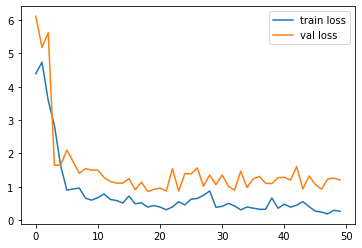

<Figure size 432x288 with 0 Axes>

In [15]:
# plotting loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

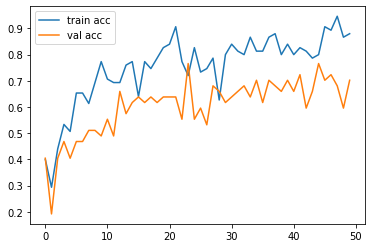

<Figure size 432x288 with 0 Axes>

In [16]:
# plotting accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/model_resnet50.h5')

In [18]:
y_pred = model.predict(test_set)
y_pred

array([[1.84535212e-03, 3.43207002e-01, 6.54947698e-01],
       [1.66187645e-03, 1.22712635e-01, 8.75625491e-01],
       [1.11164257e-03, 2.73225307e-01, 7.25663006e-01],
       [6.04472370e-05, 9.96525824e-01, 3.41371750e-03],
       [9.42830503e-01, 1.03950389e-02, 4.67744619e-02],
       [2.00625393e-03, 2.44644389e-01, 7.53349364e-01],
       [2.93454737e-03, 2.16348305e-01, 7.80717134e-01],
       [9.17607977e-05, 9.94229198e-01, 5.67912729e-03],
       [5.34403116e-05, 9.64191496e-01, 3.57549787e-02],
       [2.53051380e-03, 8.86723459e-01, 1.10746078e-01],
       [4.01091902e-03, 3.80948298e-02, 9.57894325e-01],
       [5.57821393e-02, 3.13529730e-01, 6.30688190e-01],
       [6.91291862e-05, 3.81086379e-01, 6.18844509e-01],
       [1.20033548e-08, 1.58500752e-05, 9.99984145e-01],
       [9.03815322e-04, 4.71579701e-01, 5.27516484e-01],
       [7.45750789e-04, 9.43337083e-01, 5.59170991e-02],
       [4.94611818e-08, 1.42997887e-05, 9.99985695e-01],
       [4.11947351e-03, 5.98548

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1,
       1, 2, 1])

In [20]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/drive/MyDrive/Deep Learning/Datasets/KNDataSets/CarBrandClassificationDataset/Test/lamborghini/11.jpg',target_size=(224,224))

In [21]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [22]:
x.shape

(224, 224, 3)

In [23]:
x=x/255
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.76862746, 0.73333335, 0.6745098 ],
        [0.8509804 , 0.8156863 , 0.75686276],
        [0.9529412 , 0.91764706, 0.85882354]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.9607843 , 0.92941177],
        [0.9529412 , 0.9529412 , 0.92156863],
        [0.9490196 , 0.9490196 , 0.91764706]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9411765 , 0.9764706 , 0.972549  ],
        [0.9490196 , 0.9843137 , 0.98039216],
        [0.9490196 , 0.9843137 , 0.98039216]],

       ...,

       [[0.7411765 , 0.8117647 , 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [24]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [25]:
model.predict(img_data)

array([[0.00712479, 0.8606925 , 0.13218266]], dtype=float32)

In [26]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([1])